In [1]:
from notebook_log_loading import load_sensor_log_file

#sensor_log,first_timestamp=load_sensor_log_file("../to_study/senw_imu.txt")
sensor_log,first_timestamp=load_sensor_log_file("../to_study/initial_motion_calibration_2.txt")

In [2]:
   
    
def toeuler(q):
    w=q[3]
    i=q[0]
    j=q[1]
    k=q[2]
    s=1
    
    cpch=1-2*s*(j*j+k*k)
    cpsh=2*s*(i*j+k*w)
    sp=2*s*(i*k-j*w)
    sbcp=2*s*(j*k+i*w)    
    cbcp=1-2*s*(i*i+j*j)
    
    conv=360/(2*np.pi)
    #heading=360*np.arctan2(cpsh,cpch)/(2*3.14)
    #pitch=-360*np.arcsin(sp)/(2*3.14)
    #bank=360*np.arctan2(sbcp,cbcp)/(2*3.15)
    heading=conv*np.arctan2( 2*(w*i+j*k),1-2*(i*i+j*j))
    pitch=conv*np.arcsin(np.clip(2*(w*j-k*i),-1,1))    
    bank=conv*np.arctan2( 2*(w*k+i*j),1-2*(j*j+k*k))
    return [heading,pitch,bank]

import numpy as np
rot_vecs=[]
rot_vec_ts=[]
eul_vecs=[]
eul_vecs_ts=[]
accel_vecs=[]
accel_vec_ts=[]
gyro_vecs=[]
gyro_vec_ts=[]
gyro_norm=[]
accel_norm=[]
for entry in sensor_log:
    if 'packets' in entry:
        
        
        
        #if len(entry['packets'])>1:
#            print("multipacket!")
        for packet in entry['packets']:        
            if 'rotation_vector' in packet:
                #rot_vecs.append(correct(packet["rotation_vector"]))
                eul_vecs.append(toeuler(packet["rotation_vector"]))
                #rot_vecs.append([ toheading(packet["rotation_vector"])])
                #rot_vec_ts.append(entry["timestamp"]-first_timestamp- (entry['packets'][-1]["rotation_vector_timestamp"]-packet["rotation_vector_timestamp"]))
                rot_vec_ts.append(packet["rotation_vector_timestamp"])
                rot_vecs.append(packet["rotation_vector"])                
            if 'acceleration' in packet:
                #accel_vec_ts.append(entry["timestamp"]-first_timestamp)
                accel_vec_ts.append(packet["acceleration_timestamp"])
                accel_vecs.append(packet["acceleration"])
                accel_norm.append(np.linalg.norm(np.array(packet["acceleration"])))
            if 'gyroscope' in packet:
                #gyro_vec_ts.append(entry["timestamp"]-first_timestamp     -(entry['packets'][-1]["gyroscope_timestamp"]-packet["gyroscope_timestamp"]))
                gyro_vec_ts.append(packet["gyroscope_timestamp"])
                gyro_vecs.append(packet["gyroscope"])
                gyro_norm.append( np.linalg.norm(np.array(packet["gyroscope"])))
                
                
rot_vecs=np.array(rot_vecs)
accel_vecs=np.array(accel_vecs)
eul_vecs=np.array(eul_vecs)
gyro_vecs=np.array(gyro_vecs)

In [3]:
sensor_log[1]

{'timestamp': 1625876577.3077111,
 'image_timestamp': 1885.791384,
 'detections': [{'label': 32,
   'spatial_array': [163.48727416992188, -122.6154556274414, 3008.0],
   'bbox_array': [0.5448803305625916,
    0.6137383580207825,
    0.5262246131896973,
    0.5896481871604919],
   'confidence': 0.9834063053131104},
  {'label': 11,
   'spatial_array': [-463.1731872558594, -0.0, 2087.0],
   'bbox_array': [0.17746776342391968,
    0.2187255322933197,
    0.483085572719574,
    0.5287176966667175],
   'confidence': 0.7960968017578125}],
 'keys': ['detections']}

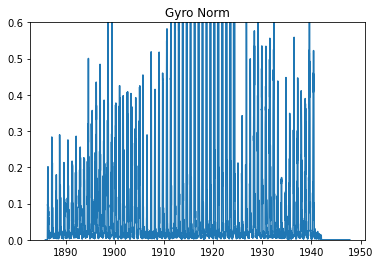

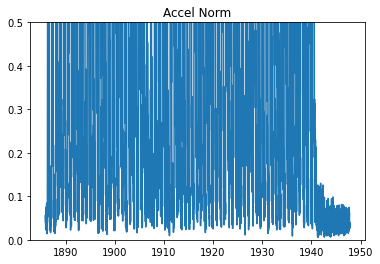

In [4]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
plt.title("Gyro Norm")
plt.ylim([0,0.6])
ax.plot( accel_vec_ts,gyro_norm)
plt.show()

fig, ax = plt.subplots()
plt.title("Accel Norm")
plt.ylim([0,0.5])
ax.plot( accel_vec_ts,accel_norm)
plt.show()

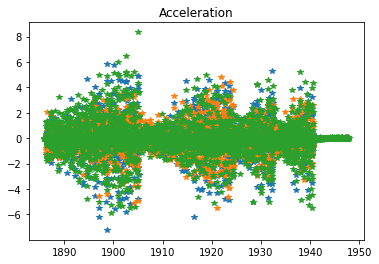

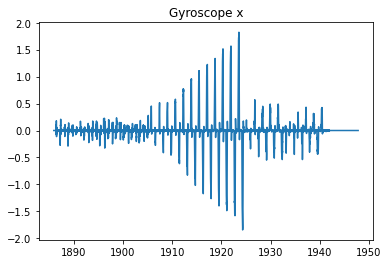

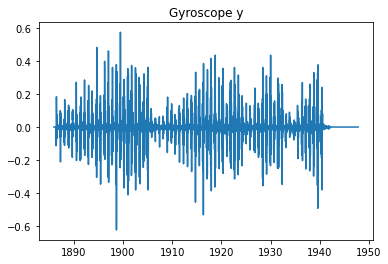

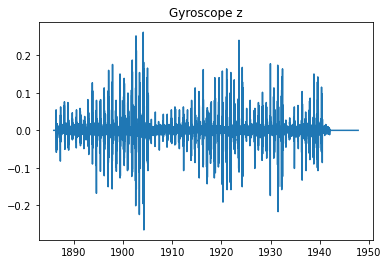

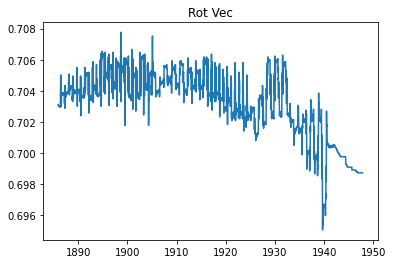

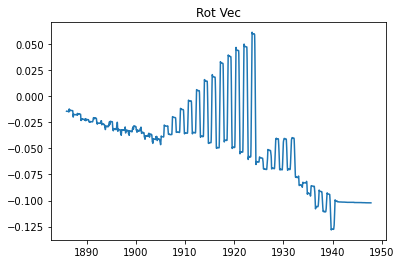

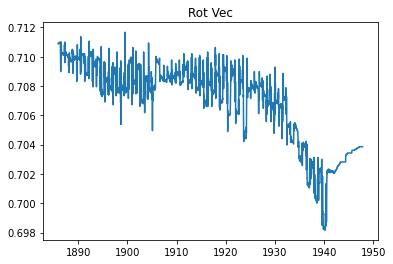

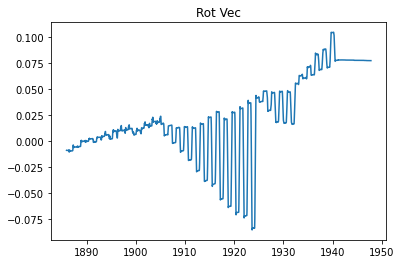

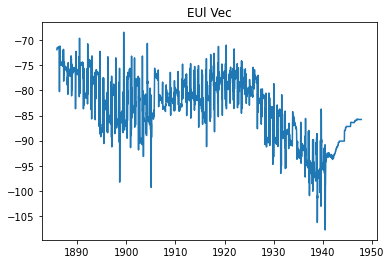

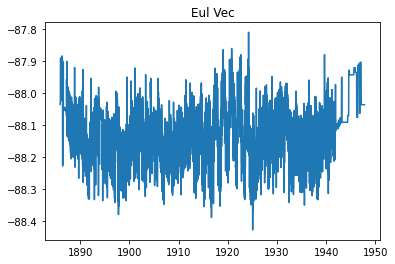

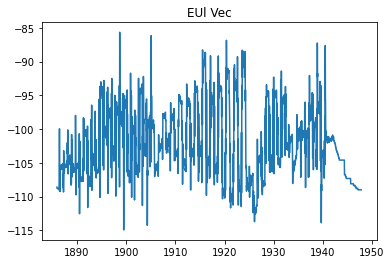

In [5]:


fig, ax = plt.subplots()
plt.title("Acceleration")
ax.plot( accel_vec_ts,accel_vecs,'*')
plt.show()
fig, ax = plt.subplots()
plt.title("Gyroscope x")
ax.plot( accel_vec_ts,gyro_vecs[:,0])
plt.show()
fig, ax = plt.subplots()
plt.title("Gyroscope y")
ax.plot( accel_vec_ts,gyro_vecs[:,1])
plt.show()
fig, ax = plt.subplots()
plt.title("Gyroscope z")
ax.plot( accel_vec_ts,gyro_vecs[:,2])
plt.show()

fig, ax = plt.subplots()
plt.title("Rot Vec")
ax.plot( rot_vec_ts,rot_vecs[:,0])
plt.show()
fig, ax = plt.subplots()
plt.title("Rot Vec")
ax.plot( rot_vec_ts,rot_vecs[:,1])
plt.show()
fig, ax = plt.subplots()
plt.title("Rot Vec")
ax.plot( rot_vec_ts,rot_vecs[:,2])
plt.show()
fig, ax = plt.subplots()
plt.title("Rot Vec")
ax.plot( rot_vec_ts,rot_vecs[:,3])
plt.show()
fig, ax = plt.subplots()
plt.title("EUl Vec")
ax.plot( rot_vec_ts,eul_vecs[:,0])
plt.show()
fig, ax = plt.subplots()
plt.title("Eul Vec")
ax.plot( rot_vec_ts,eul_vecs[:,1])
plt.show()
fig, ax = plt.subplots()
plt.title("EUl Vec")
ax.plot( rot_vec_ts,eul_vecs[:,2])
plt.show()


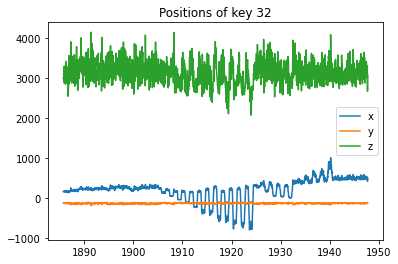

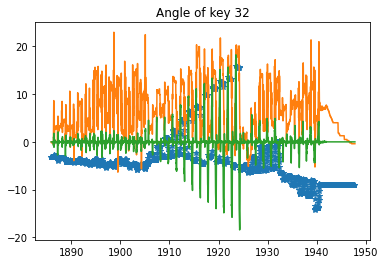

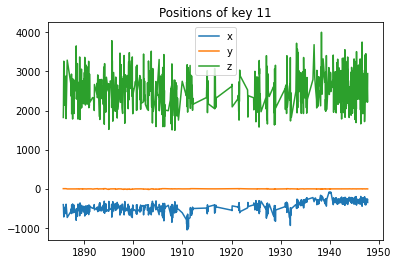

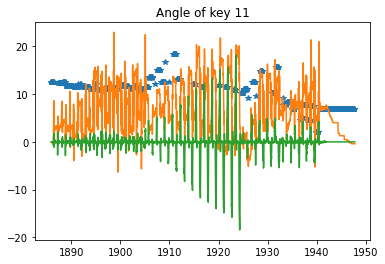

In [10]:
from matplotlib import pyplot as plt

def get_unique_tagged_objects(tagged_objects,objects_to_watch):
        ret={}
        label_list=[ x["label"] for x in tagged_objects]
        for key in objects_to_watch:
            if label_list.count(key)>1 or label_list.count(key)==0:
                continue
            elem=next(filter(lambda x: x["label"]==key,tagged_objects))
            ret[key]=elem
        return ret

positions={}
timestamps={}
for message in sensor_log:
    if "detections" in message:
        dets=get_unique_tagged_objects(message["detections"],[32,11])
        for key in dets:
            if key not in positions:
                positions[key]=[]
                timestamps[key]=[]
            positions[key].append(dets[key]["spatial_array"])
            #timestamps[key].append(message["timestamp"]-first_timestamp)
            timestamps[key].append(message["image_timestamp"])
for key in positions:
    positions[key]=np.array(positions[key])
    
for key in positions:
    fig, ax = plt.subplots()
    plt.title("Positions of key {}".format(key))
    #plt.ylim([0,0.5])
    labels=["x","y","z"]
    for i in range(3):
        ax.plot( timestamps[key],positions[key][:,i],label=labels[i])
    plt.legend()
    plt.show()
    fig, ax = plt.subplots()
    plt.title("Angle of key {}".format(key))
    #plt.ylim([0,0.5])
    #plt.xlim(1922,1926)
    ax.plot( timestamps[key],-(360/(2*np.pi))*np.arctan2(positions[key][:,0],positions[key][:,2]) ,'*'           )
    ax.plot( rot_vec_ts,eul_vecs[:,2]-eul_vecs[0,2])
    ax.plot( gyro_vec_ts,10*gyro_vecs[:,0])

    plt.show()

In [13]:
tstart=None
for message in sensor_log:    
    if "detections" in message:
        t=message["image_timestamp"]
        if tstart==None:
            tstart=t
        t=t-tstart
        print("{} image".format(t))
    if 'packets' in message:
        t1=message["packets"][0]["gyroscope_timestamp"]
        t2=message["packets"][-1]["gyroscope_timestamp"]
        if tstart==None:
            tstart=t1
        t1=t1-tstart
        t2=t2-tstart
        print("{} - {} has {} packets".format(t1,t2,len(message["packets"])))

0.0 image
0.03332900000009431 image
0.14087900000004083 - 0.1959070000000338 has 5 packets
0.09998700000005556 image
0.20829400000002352 - 0.2459120000000894 has 5 packets
0.13331799999991745 image
0.25817000000006374 - 0.3009549999999308 has 5 packets
0.16664300000002186 image
0.19997799999987365 image
0.31324399999994057 - 0.3583530000000792 has 5 packets
0.23330000000009932 image
0.37098599999990256 - 0.4257789999999204 has 5 packets
0.2666309999999612 image
0.29995800000006057 image
0.3332860000000437 image
0.43380499999989297 - 0.4883919999999762 has 5 packets
0.3666200000000117 image
0.504032000000052 - 0.5509600000000319 has 5 packets
0.39994400000000496 image
0.4666010000000824 image
0.5658960000000661 - 0.6158559999998943 has 5 packets
0.4999359999999342 image
0.5332599999999275 image
0.6282759999999143 - 0.6785429999999906 has 5 packets
0.5665870000000268 image
0.5999159999998938 image
0.6909840000000713 - 0.7363109999998869 has 5 packets
0.633246999999983 image
0.74841599999